In [4]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [5]:
deliveryData = pd.read_csv('delivery_time.csv')

In [6]:
deliveryData.head()
# concluding from problem statement
# 'Sorting Time' is feature
# 'Delivery Time' is target

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
deliveryData.info()
# both columns are of numerical dtype
# no null values present
# implies no need to perform imputation 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
deliveryData.describe()
# inspecting moments

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
# storing feature data in X
X = deliveryData[['Sorting Time']]

In [10]:
# storing target data in Y
Y = deliveryData[['Delivery Time']]

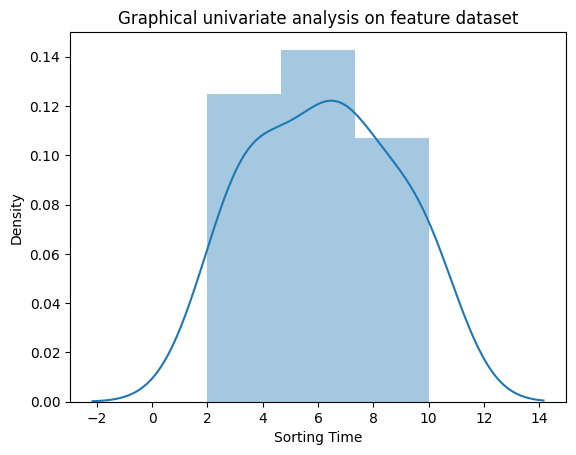

In [11]:
# Graphical univariate analysis on feature dataset
sns.distplot(X,kde=True)
plt.xlabel('Sorting Time')
plt.title('Graphical univariate analysis on feature dataset')
plt.show()
# graphically distribution seems normal 
# no outliers present 

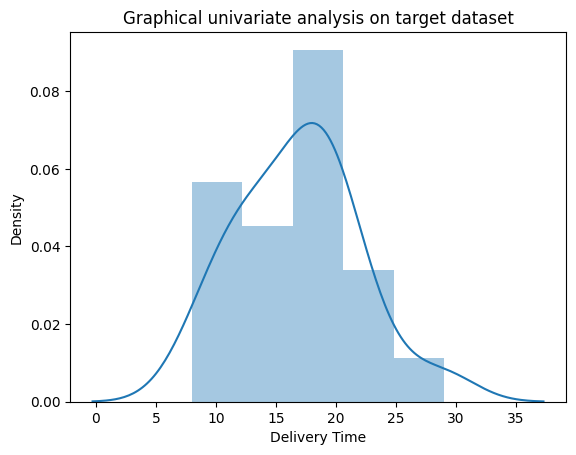

In [12]:
# Graphical univariate analysis on target dataset
sns.distplot(Y,kde=True)
plt.xlabel('Delivery Time')
plt.title('Graphical univariate analysis on target dataset')
plt.show()
# graphically distribution seems right skewed
# no outliers present 

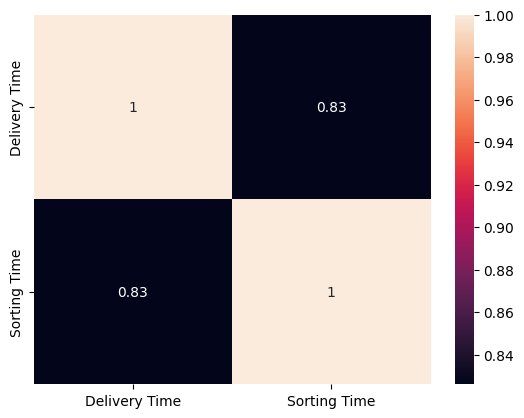

In [13]:
# bivariate analysis
# checking for correlation between variables
sns.heatmap(deliveryData.corr(),annot=True)
plt.show()
# there exists correlation between feature and target

In [14]:
# quantifying skewness of feature dataset 
X.skew()
# since skewness of feature is considerably small 
# no need to perform transformation 

Sorting Time    0.047115
dtype: float64

In [15]:
# quantifying skewness of target dataset
Y.skew()
# since skewness of target is considerably high 
# need to perform transformation 

Delivery Time    0.35239
dtype: float64

In [16]:
# performing square root transformation on target dataset
# to reduce skewness
new_Y = Y**0.5 
# after making predicions take square of it 

In [17]:
new_Y.skew()
# skewness after transformation is reduced  

Delivery Time   -0.061811
dtype: float64

In [18]:
# new dataframe of dataset after transformation 
newData = pd.DataFrame({'Sorting Time':X.values.ravel(),
                        'Delivery Time':new_Y.values.ravel()},
                         index=deliveryData.index)

In [19]:
# making linear regression model using ols
# passing new dataframe as data 
model = smf.ols(formula='Q("Delivery Time") ~ Q("Sorting Time")',
               data=newData).fit()

In [20]:
model.summary()
# intercept of best fitted line is 2.7727
# feature coefficient in 0.2066
# t-statistic of feature and intercept are high and p-value is 0
# reject null hypothesis that all the coefficients are 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Delivery Time")   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           2.00e-06
Time:                        14:25:05   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7727      0.205     13.527      0.000       2.344       3.202
Q("Sorting Time")     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# storing actual target values in var
actual = new_Y.values.ravel()

In [22]:
# storing prediction values in var
pred = model.predict(X).values

In [23]:
result = pd.DataFrame({'Actual':actual,
                       'predicted':pred})

In [24]:
result.head()

,Actual,predicted
0,4.582576,4.839049
1,3.674235,3.599258
2,4.444097,4.012522
3,4.898979,4.632417
4,5.385165,4.839049


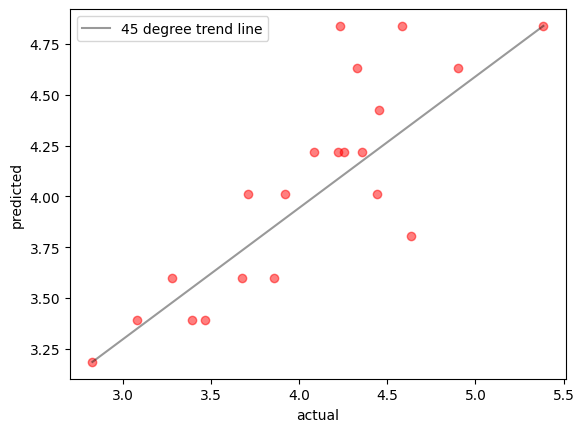

In [25]:
# expecting scatter plot to follow 45 degree trend line
# if predicted values are same as actual values
plt.scatter(actual,pred,
           color='red',alpha=0.5)
plt.plot([actual.min(),actual.max()],
         [pred.min(),pred.max()],color='black',
         alpha=0.4,label='45 degree trend line')
plt.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()
# scatter plot seems to follow 45 degree trend line 

In [26]:
score = r2_score(actual,pred)*100

In [29]:
model.params

Intercept            2.772731
Q("Sorting Time")    0.206632
dtype: float64

In [35]:
beta = model.params.Intercept
eps = model.params['Q("Sorting Time")']

In [37]:
# evaluating model preformance using r2score 
print('model training accuracy is : %.2f %%' % score)

model training accuracy is : 70.40 %


In [39]:
# built simple linear regression model 
# with 70.40% accuracy score on 'training dataset' 
# 'Y' is delivery_time(target)
# 'X' is 'sorting_time'(feature)
Y = (beta*X + eps)**2